In [1]:
%matplotlib inline

In [70]:
import numpy as np
import matplotlib
from graph_tool.all import load_graph, GraphView, Graph
from graph_tool.topology import kcore_decomposition
from networkit.graphio import readGraph, Format

from brute_force import do_brute_force
from util import complementary_edges


In [3]:
from graph_tool.all import load_graph, sfdp_layout, graph_draw
from graph_tool.topology import kcore_decomposition

In [4]:
g = load_graph('data/karate.gml')

In [5]:
gg = readGraph('data/karate.edgelist', fileformat=Format.EdgeListSpaceOne)
cand_edges = complementary_edges(gg)
optimal_edges = do_brute_force(gg,
                               2, cand_edges)

In [42]:
optimal_edges

{(7, 31), (30, 31)}

In [49]:
set(map(int, g.vertex(31).out_neighbours())).intersection(set(nodes_c4))

{0, 32, 33}

In [6]:
core = kcore_decomposition(g)

In [38]:
K = 4

In [39]:
nodes_c4 = list(np.nonzero(core.a == K)[0])

In [40]:
vfilt = g.new_vertex_property('bool')
for n in nodes_c4:
    vfilt[n] = True
subg = GraphView(g, vfilt=vfilt)

In [41]:
deg = subg.degree_property_map('out')

In [73]:
for v in subg.vertices():
    print(v, deg[v])

0 6
1 6
2 7
3 5
7 4
8 5
13 5
30 4
32 4
33 4


In [64]:
nodes_to_match = set((deg.a == K).nonzero()[0]).intersection(nodes_c4)
print(nodes_to_match)

{32, 33, 30, 7}


In [78]:
for n in nodes_to_match:
    print(n, set(map(int, subg.vertex(n).out_neighbours())).intersection(nodes_to_match))

32 {33, 30}
33 {32, 30}
30 {32, 33}
7 set()


In [65]:
comp_edges = complementary_edges(subg)

In [84]:
needed_comp_edges = []
for u, v in comp_edges:
    if u in nodes_to_match and v in nodes_to_match:
        needed_comp_edges.append((u, v))

In [85]:
comp_g = Graph(directed=False)

In [86]:
comp_g.add_vertex(g.num_vertices())
comp_g.add_edge_list(needed_comp_edges)

In [87]:
comp_g.set_vertex_filter(vfilt)

In [88]:
pos = sfdp_layout(comp_g)

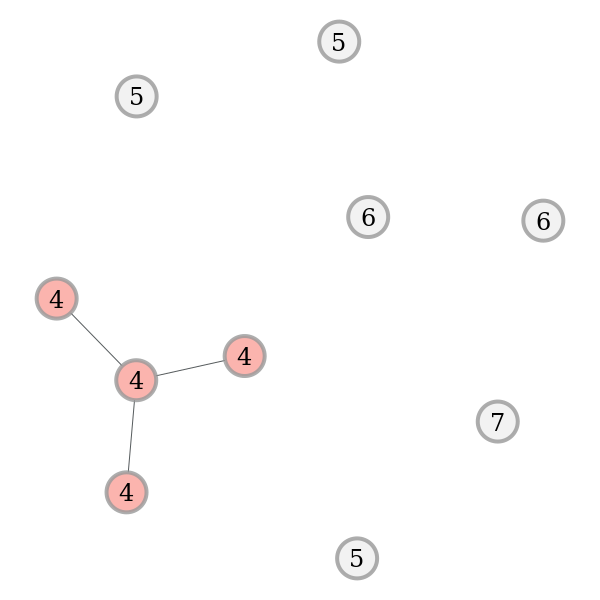

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7fc669990518, at 0x7fc6699904e0>

In [91]:
font_size = 24
vertex_size = 40
color = comp_g.new_vertex_property('int')
for v in nodes_to_match:
    color[v] = 1 
graph_draw(comp_g, pos, 
           edge_pen_width=1,
           vertex_fill_color=color,
           vertex_font_size=font_size,
           vertex_size=vertex_size, 
           vertex_text=deg,
           output='figs/example-for-subcore.png',
           vcmap=matplotlib.cm.Pastel1_r)